## LIBRARIES

In [43]:
# Data manipulation
import numpy as np
import pandas as pd

# Visalization
import matplotlib.pyplot as plt
import seaborn as sns

# To count occurrences of each class (for majority voting)
from collections import Counter

## DATA

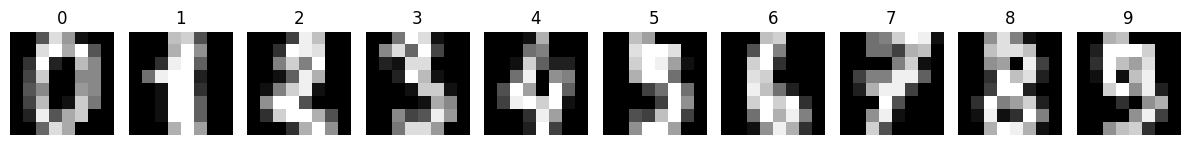

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,7
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0,8
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9


In [44]:
# Load the digits dataset
digits = load_digits()

# Create a list to store one example for each digit (0 to 9)
examples = []

# Loop over digits 0 through 9
for digit in range(10):
    # Find the index of the first occurrence of this digit in the dataset
    index = np.where(digits.target == digit)[0][0]
    
    # Append the image and its label to the list
    examples.append((digits.images[index], digit))

# Create a row of subplots to display the digits
fig, axes = plt.subplots(1, 10, figsize=(12, 2))

# Plot each example
for i, (image, label) in enumerate(examples):
    # Display image in grayscale
    axes[i].imshow(image, cmap='gray')         
    # Set title as the digit label
    axes[i].set_title(str(label))              
    # Remove axis ticks
    axes[i].axis('off')                        

# Adjusts spacing between subplots to prevent overlap
plt.tight_layout()
# Displays the entire figure with all plotted subplots
plt.show()

# Create a DataFrame to inspect the raw feature data (flattened pixel values)
df = pd.DataFrame(digits.data)
# Add the class label column
df["target"] = digits.target  

# Show the first 10 rows of the dataset
df.head(10)

## EUCLIDEAN DISTANCE

In [45]:
# Compute euclidean distance 
def euclidean_distance(x1, x2):
    # Ensure both vectors have the same shape 
    if x1.shape != x2.shape:
        raise ValueError("Input vectors must have the same shape.")
    # Initialize sum of squared differences
    total = 0 
    # Iterate over each feature (each pixel)
    for j in range(x1.shape[0]):
        # Compute the squared difference for the current feature
        squared_diff = (x1[j] - x2[j]) ** 2
        # Add it to the running total
        total += squared_diff
    # Return the square root of the total to get the Euclidean distance
    return np.sqrt(total)

## PREDICTION

In [46]:
# Predict a class of a single test sample using KNN
def predict(x, data, labels, k):
    # Initialize an empty list to store (distance, label) pairs
    distances = [] 
    # Step 1: Compute distance from x to each training sample
    for i in range(data.shape[0]):
        # Compute Euclidean distance between the test sample and training sample i
        distance = euclidean_distance(x, data[i])
        # Append the distance and its corresponding label to the list
        distances.append((distance, labels[i]))
    # Step 2: Sort the list of (distance, label) pairs based on the distance value.
    distances.sort(key=lambda pair: pair[0])
    # Step 3: Extract the labels of the k nearest neighbors
    k_labels = [label for (_, label) in distances[:k]]
    # Step 4: Use majority vote to choose the most common class
    most_common = Counter(k_labels).most_common(1)[0][0]
    # Return the predicted label
    return most_common

## TEST

In [47]:
# Counter for correct predictions
correct = 0 

# Number of neighbors
k = 4        

# Loop over the first 100 test samples
for i in range(100):
    # Get the test sample and true label
    x_test = X_test_scaled[i]
    true_label = y_test[i]
    # Predict the label using your KNN function
    predicted_label = predict(x_test, X_train_scaled, y_train, k)
    # Compare prediction with true label
    if predicted_label == true_label:
        correct += 1

# Calculate and display accuracy
accuracy = correct / 100 * 100
print(f"Accuracy on first 100 test samples: {accuracy:.2f}%")

Accuracy on first 100 test samples: 98.00%
